In [1]:
import json

def import_file(path) -> dict:
    with open(path) as file:
        return json.load(file)

In [2]:
path = "/localdev/jdesousa/tt-mlir/analyzer_out.json"

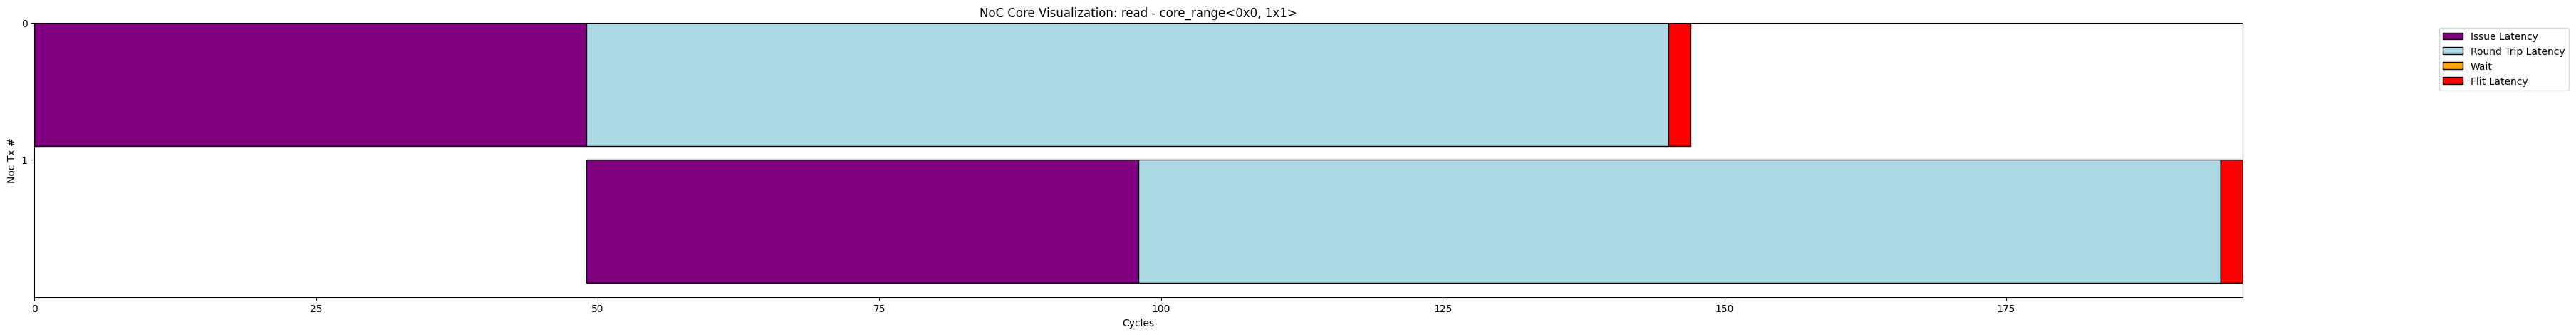

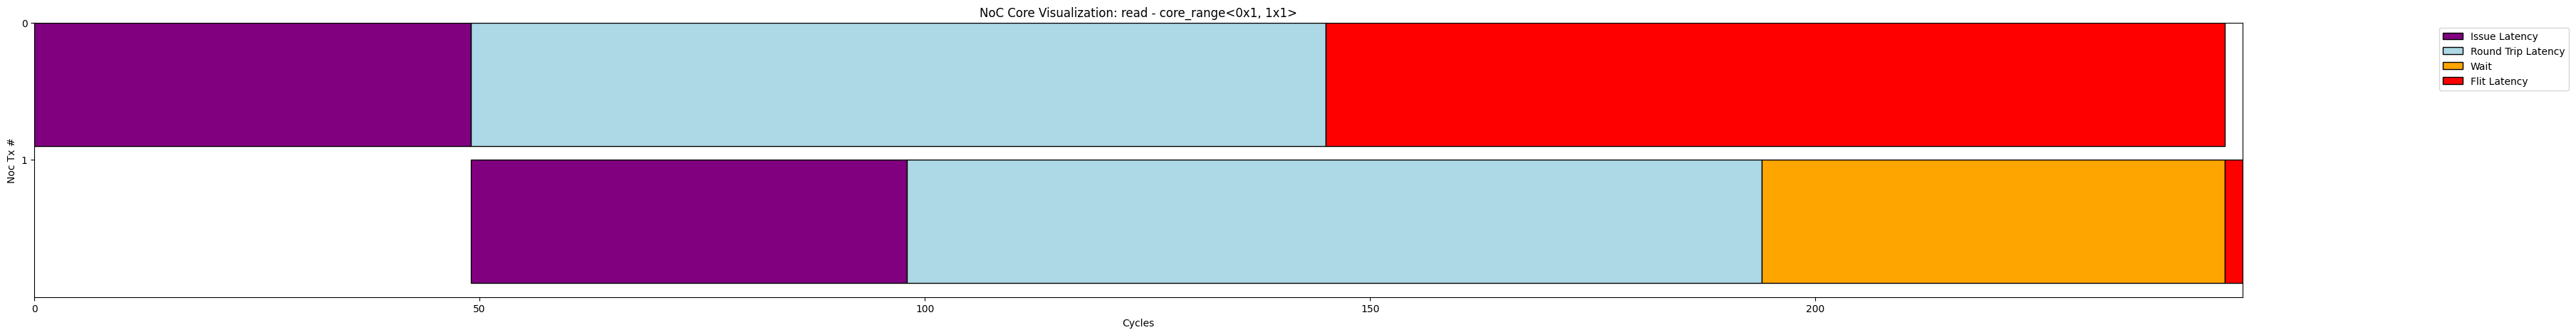

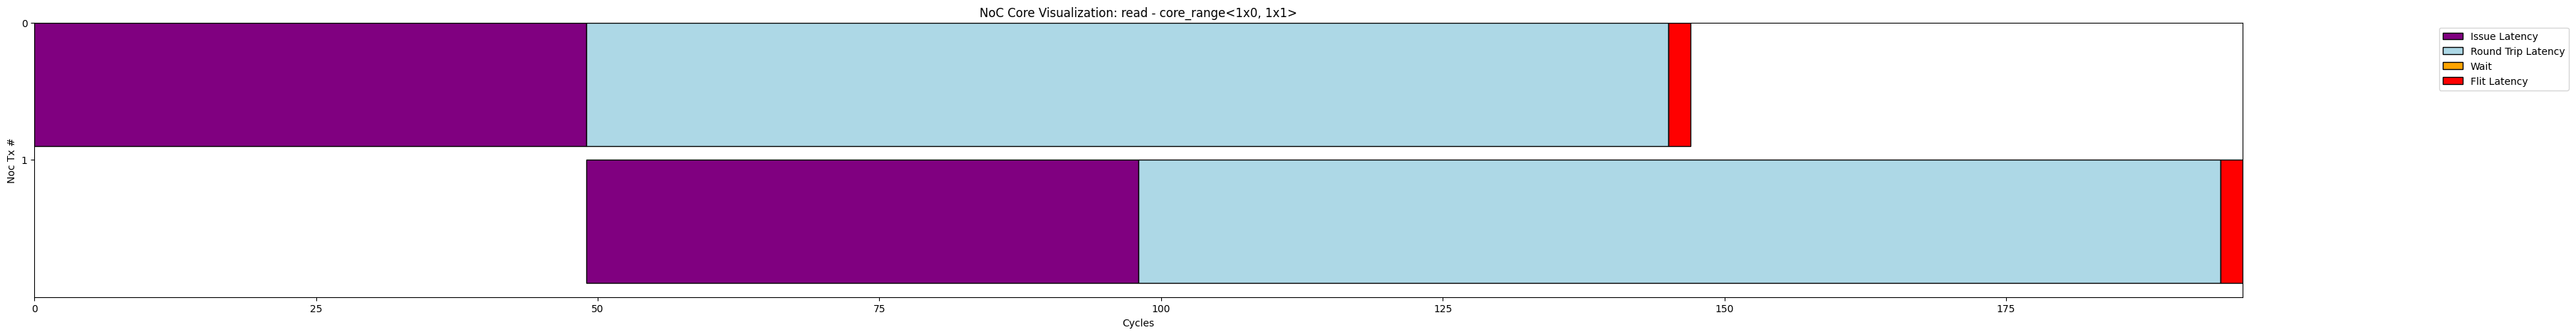

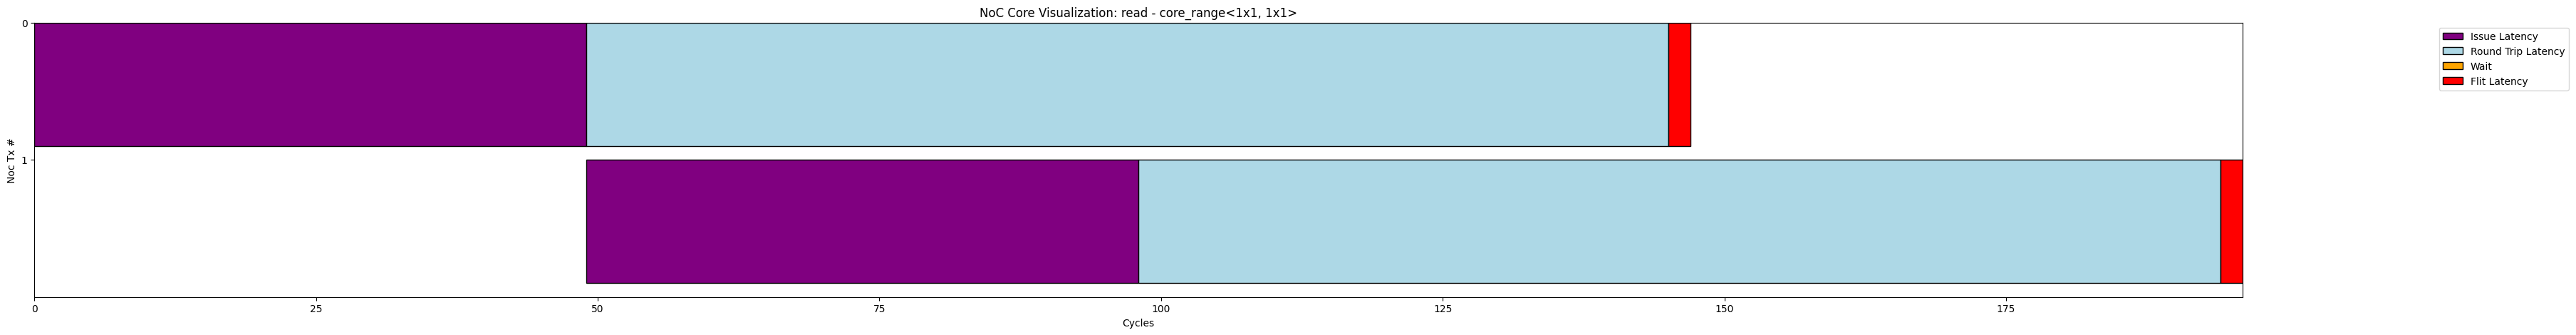

/tmp/ipykernel_24243/4045514601.py:31: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(0, txs[str(num_txs - 1)]["flit_latency"]["end_cycle"] if num_txs > 0 else num_txs)  # Adjust as needed for your timeline
/tmp/ipykernel_24243/4045514601.py:32: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, num_txs)


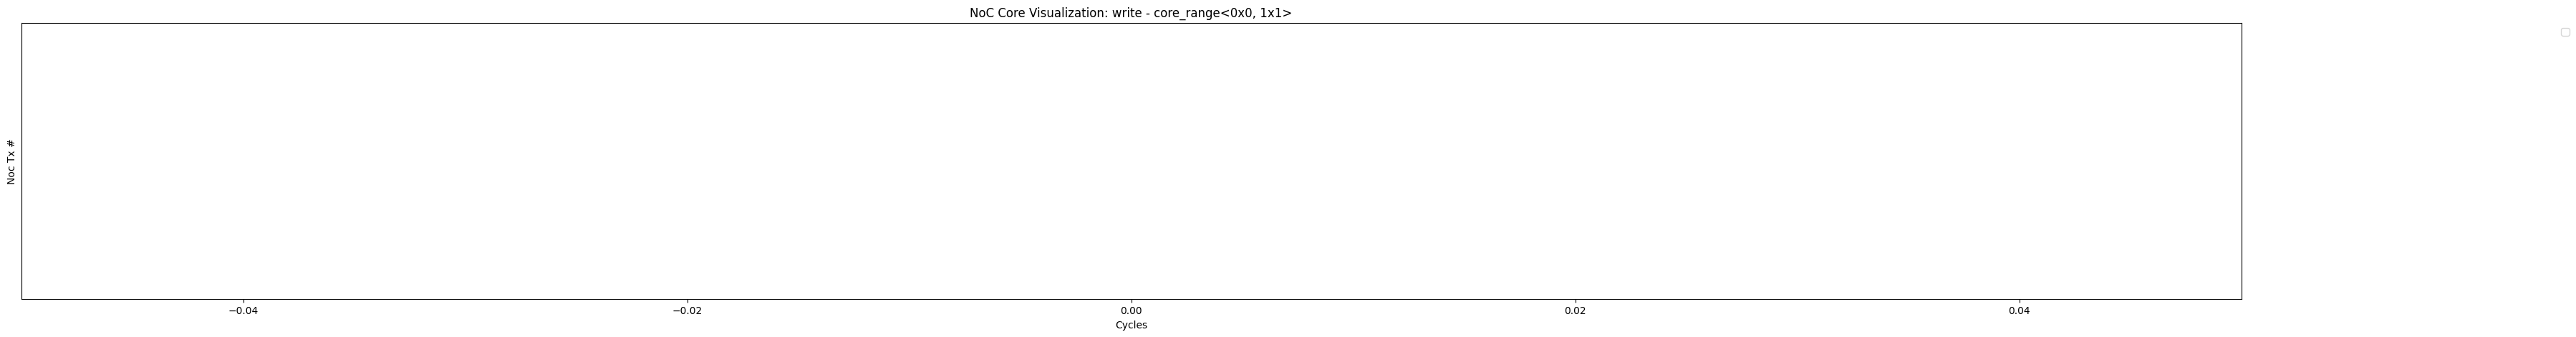

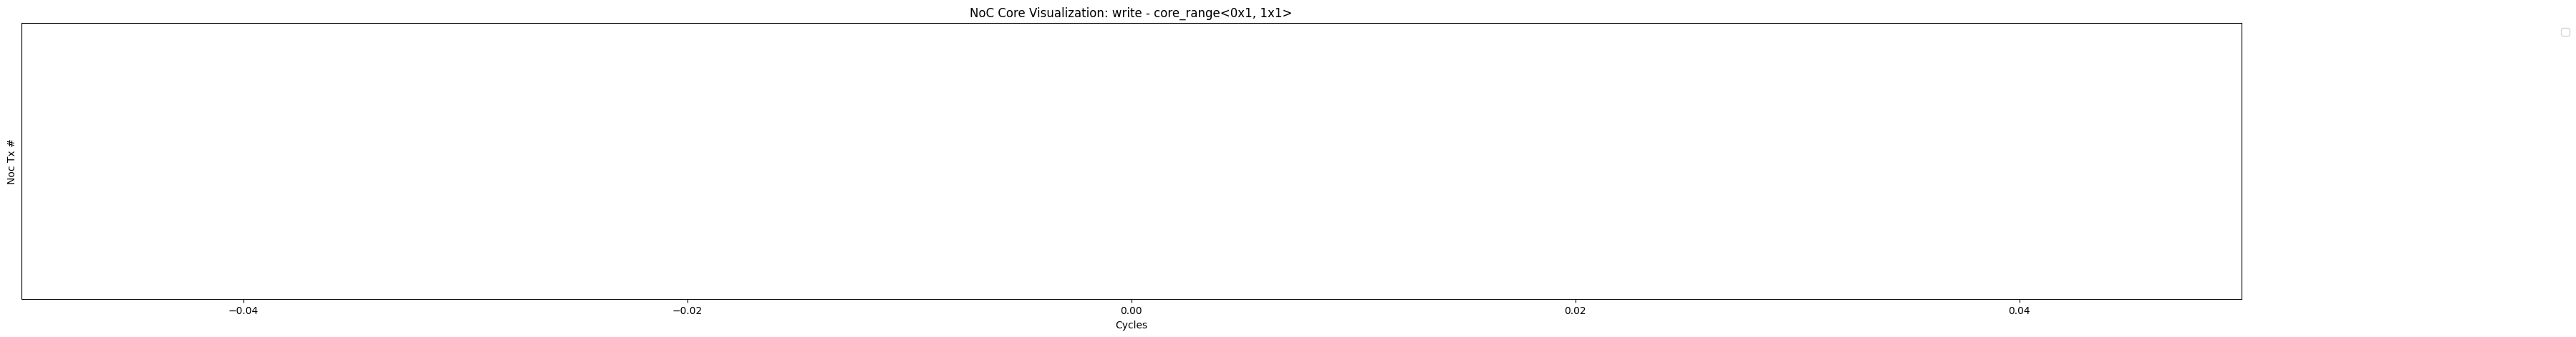

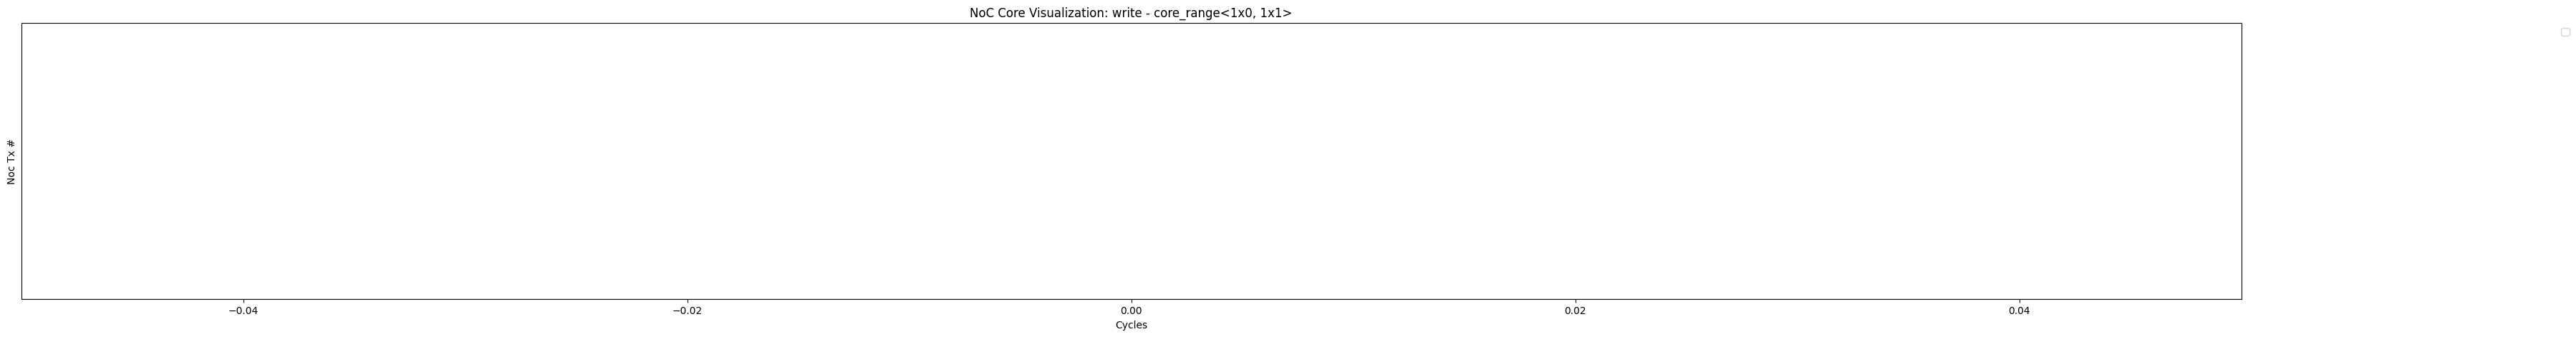

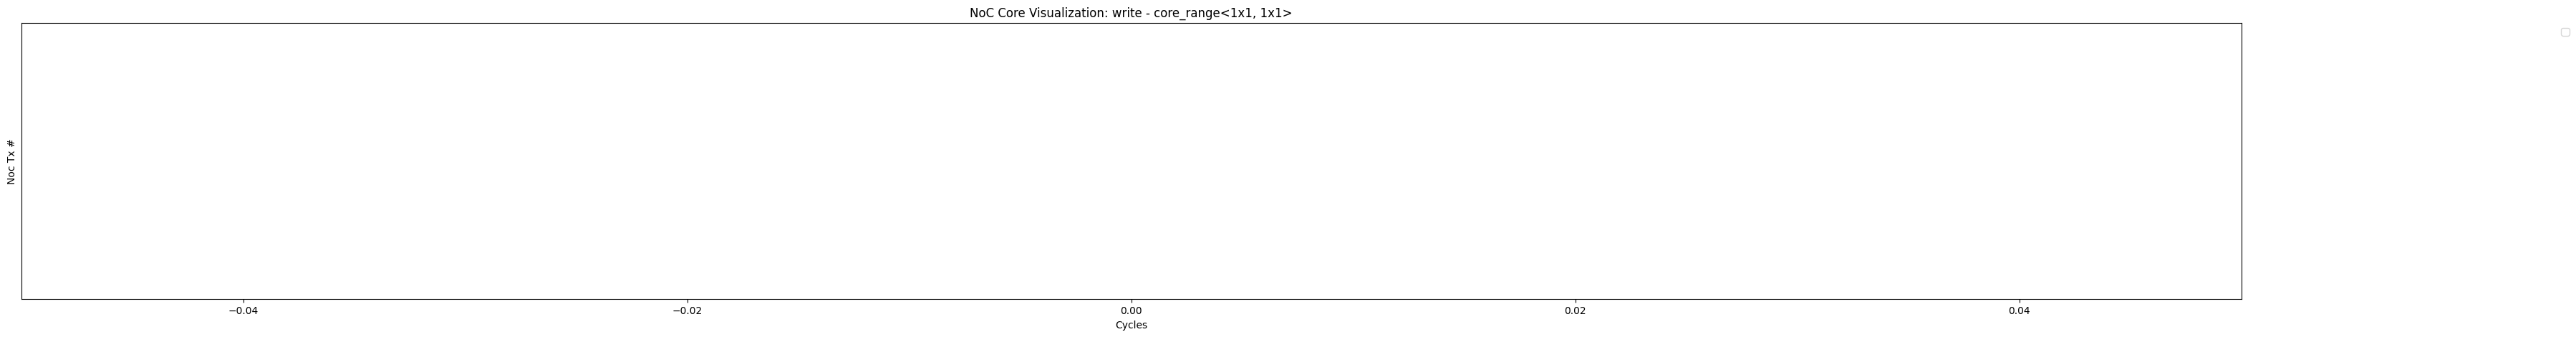

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Sample data: Each tuple is (start_time, duration, process_id)
file = import_file(path)

def create_plot(core, txs, type):
    num_txs = int(max(txs.keys())) + 1 if txs != None else 0
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(40, 5))
    rects = []

    for i in range(num_txs):
        til = patches.Rectangle((txs[str(i)]["total_issue_latency"]["start_cycle"], i), txs[str(i)]["total_issue_latency"]["duration"], 0.9, edgecolor='black', facecolor='purple', label="Issue Latency")
        rtl = patches.Rectangle((txs[str(i)]["round_trip_latency"]["start_cycle"], i), txs[str(i)]["round_trip_latency"]["duration"], 0.9, edgecolor='black', facecolor='lightblue', label="Round Trip Latency")
        wl = patches.Rectangle((txs[str(i)]["wait"]["start_cycle"], i), txs[str(i)]["wait"]["duration"], 0.9, edgecolor='black', facecolor='orange', label="Wait")
        fl = patches.Rectangle((txs[str(i)]["flit_latency"]["start_cycle"], i), txs[str(i)]["flit_latency"]["duration"], 0.9, edgecolor='black', facecolor='red', label="Flit Latency")
        ax.add_patch(til)
        ax.add_patch(rtl)
        ax.add_patch(wl)
        ax.add_patch(fl)
        if i == 0:
            rects.append(til)
            rects.append(rtl)
            rects.append(wl)
            rects.append(fl)
    
    # Set the limits and labels
    ax.legend(handles=rects, loc='upper right', bbox_to_anchor=(1.15, 1))

    ax.set_xlim(0, txs[str(num_txs - 1)]["flit_latency"]["end_cycle"] if num_txs > 0 else num_txs) 
    ax.set_ylim(0, num_txs)
    ax.invert_yaxis()
    ax.set_yticks(list(range(num_txs))) 
    ax.set_xlabel('Cycles')
    ax.set_ylabel('Noc Tx #') 
    ax.set_title('NoC Core Visualization: ' + type + " - " + core)


    # Show the plot
    plt.show()

for op_type in file:
    for core in file[op_type]:
        create_plot(core, file[op_type][core], op_type)